In [1]:
import os
import json
from glob import glob
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from PIL import Image, ImageSequence


In [2]:
#reading the files 
dir_name = "C:\\Users\\rashm\\Documents\\R&S competition\\starting_kit\\public_data"
dest_dir = "C:\\Users\\rashm\\Documents\\R&S competition\\starting_kit\\public_data\\rotated"
base_filename = "*"
filename_suffix = "tiff"
path_name = os.path.join(dir_name, base_filename + "." + filename_suffix)

    



In [3]:


def visualize_microwave_volume(input_file, dynamic_range=25, label=None):
    """
    Visualize the slices of a microwave image volume in logarithmic scale with the given dynamic_range
    :param string input_file: Path to input file
    :param float dynamic_range: Dynamic range in dB (default: 25)
    """

  
   

    if label is None:
        label_filename = input_file
        if os.path.exists(label_filename):
            with open(label_filename, 'r') as file:
                label = json.loads(file.read())
    
    img =  io.imread(input_file.replace('.json', '.tiff'))
    fig, axs = plt.subplots(1, 1, figsize=(16, 7))
    
    volume = img
    max_val = np.max(volume)
    axs.imshow(20*np.log10(volume), vmax=max_val, vmin=max_val - dynamic_range)
    axs.set_title(f"Slice {i + 1:d}")

    if label is not None:
        x_coords = [coord[0] for coord in label['coordinates']['present']]
        y_coords = [257-coord[1] for coord in label['coordinates']['present']]
        axs.scatter(x_coords, y_coords, color='white')

        x_coords = [coord[0] for coord in label['coordinates']['missing']]
        y_coords = [257 - coord[1] for coord in label['coordinates']['missing']]
        axs.scatter(x_coords, y_coords, color='red')

    if label is not None:
        fig.canvas.set_window_title(f"Present pills: {len(label['coordinates']['present'])}, "
                                        f"Missing pills: {len(label['coordinates']['missing'])}")

    plt.show()

C:\Users\rashm\AppData\Local\Temp\ipykernel_66540\2044382337.py:35: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(f"Present pills: {len(label['coordinates']['present'])}, "


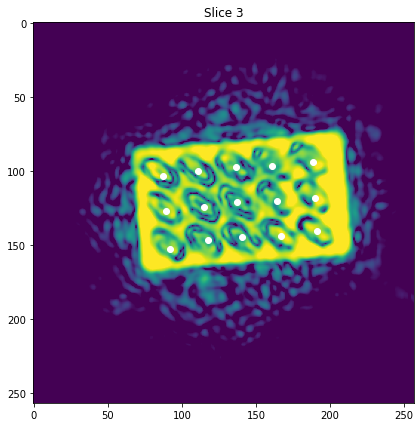

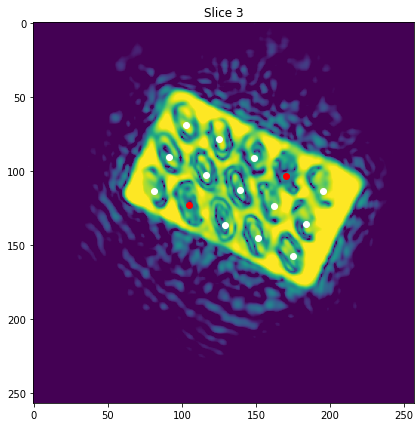

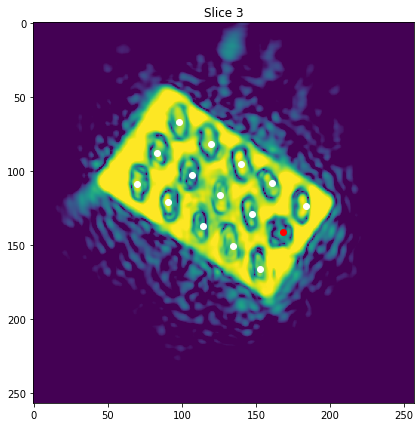

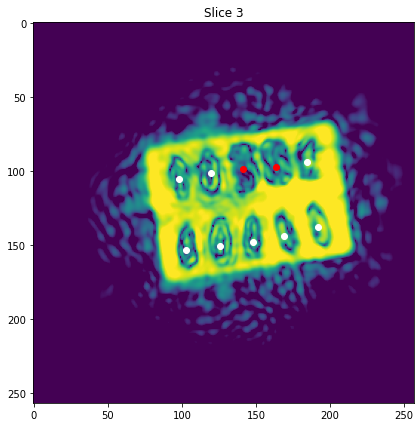

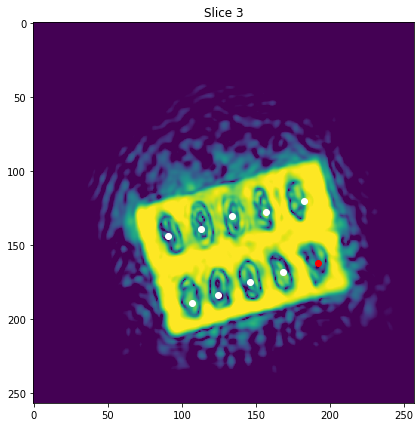

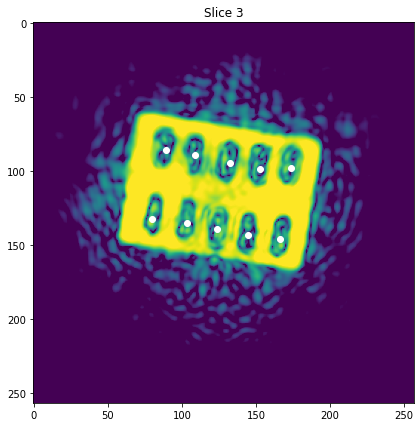

In [5]:
rot = 90

for file_name in glob(path_name):
 
    f = open(file_name.replace(".tiff",f".json"))
    scr_path = os.path.join(dir_name, file_name)
    image  = Image.open(scr_path)
    for i, page in enumerate(ImageSequence.Iterator(image)):
        f_name = file_name.replace(".tiff",f"_copy{i}{rot}.tiff")
        page = page.rotate(rot)
        if i == 0 :
            dst_path = os.path.join(dest_dir, os.path.split(f_name)[1])
            page.save(dst_path)

    data = json.load(f)
     
    if rot == 180:
        x_p = [257-coord[1] for coord in data['coordinates']['present']]
        y_p = [coord[0] for coord in data['coordinates']['present']]
        presentxy = [[x,y] for x,y in zip(x_p,y_p)]

        x_m = [257-coord[1] for coord in data['coordinates']['missing']]
        y_m = [coord[0] for coord in data['coordinates']['missing']]
        missingxy = [[x,y] for x,y in zip(x_m,y_m)]
    elif rot ==90:
        x_p = [257-coord[1] for coord in data['coordinates']['present']]
        y_p = [coord[0] for coord in data['coordinates']['present']]
        presentxy = [[x,y] for x,y in zip(x_p,y_p)]

        x_m = [257-coord[1] for coord in data['coordinates']['missing']]
        y_m = [coord[0] for coord in data['coordinates']['missing']]
        missingxy = [[x,y] for x,y in zip(x_m,y_m)]


    json_dir = dict.fromkeys(['files','coordinates','missing_pills', 'present_pills'])

    f_name_json = dst_path.replace(".tiff",f".json")
    json_dir["files"] =  os.path.split(dst_path)[1]
    coord_dir = dict.fromkeys(['missing', 'present'])
    coord_dir["present"] = presentxy
    coord_dir["missing"] = missingxy
    json_dir["coordinates"] = coord_dir
    json_dir["missing_pills"] = data["missing_pills"]
    json_dir["present_pills"] = data["present_pills"]
    with open(f_name_json, 'w') as fp:
        json.dump(json_dir, fp)
    visualize_microwave_volume(f_name_json)
    




    
